In [1]:
import numpy as np
import pandas as pd ## for reading text files and manipulating data frames
import pydicom 
import os
import cv2
from sklearn import neighbors ## kNN classifier
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from matplotlib import pyplot as plt
np.random.seed(12) ## set random seed just in case

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
DATA_DIR = './rawdata/TestSet1'

In [4]:
usefulimages = [el for el in os.listdir(DATA_DIR+'/Useful') if el.endswith('.dcm')]
notusefulimages = [el for el in os.listdir(DATA_DIR+'/Notuseful') if el.endswith('.dcm')]

In [5]:
usefulimages

['H7DAICOC.dcm',
 'H7DAID0E.dcm',
 'H7DAID0G.dcm',
 'H7DAID0I.dcm',
 'H7DAID0K.dcm',
 'H7DAID0M.dcm',
 'H7DAID0O.dcm',
 'H7DAID0Q.dcm',
 'H7DAID0S.dcm',
 'H7DAID0U.dcm',
 'H7DAID9C.dcm',
 'H7DAID9E.dcm',
 'H7DAID9G.dcm',
 'H7DAID9I.dcm',
 'H7DAID9K.dcm',
 'H7DAID9M.dcm',
 'H7DAIDHO.dcm',
 'H7DAIDHQ.dcm',
 'H7DAIDHS.dcm',
 'H7DAIDHU.dcm',
 'H7DAIDI0.dcm',
 'H7DAIDI2.dcm',
 'H7DAIDI4.dcm',
 'H7DAIDQ6.dcm',
 'H7DAIDQ8.dcm']

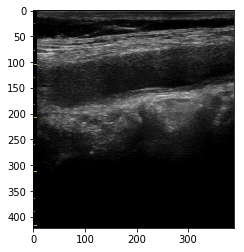

H7DAICOC.dcm


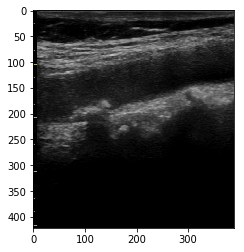

H7DAID0E.dcm


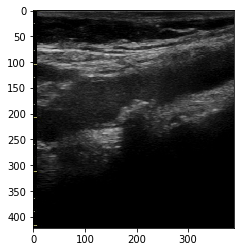

H7DAID0G.dcm


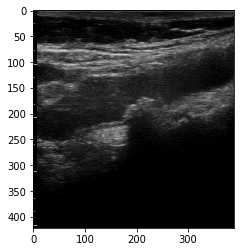

H7DAID0I.dcm


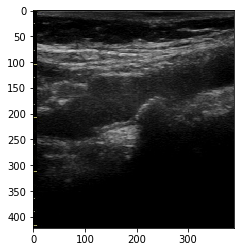

H7DAID0K.dcm


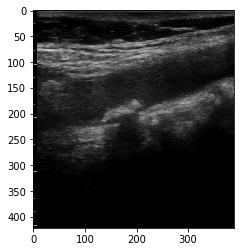

H7DAID0M.dcm


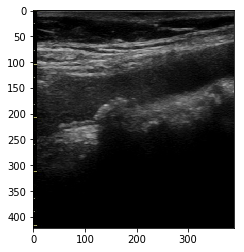

H7DAID0O.dcm


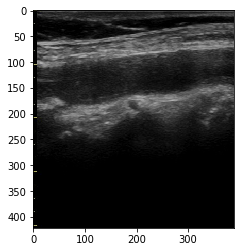

H7DAID0Q.dcm


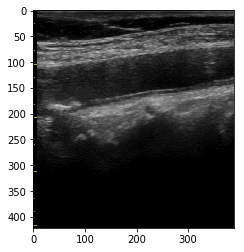

H7DAID0S.dcm


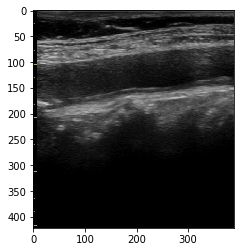

H7DAID0U.dcm


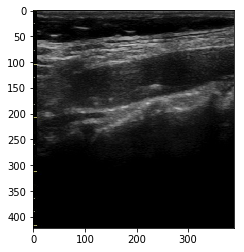

H7DAID9C.dcm


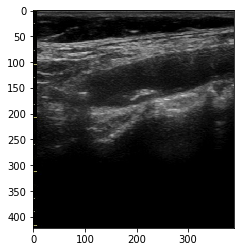

H7DAID9E.dcm


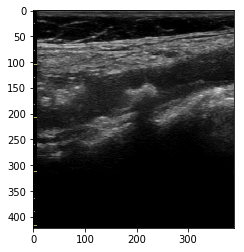

H7DAID9G.dcm


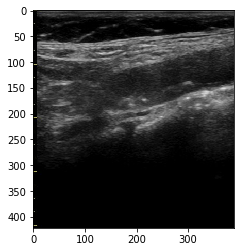

H7DAID9I.dcm


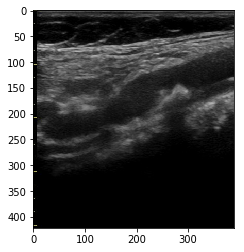

H7DAID9K.dcm


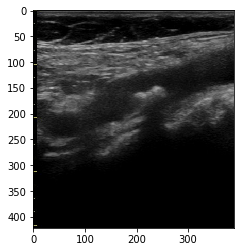

H7DAID9M.dcm


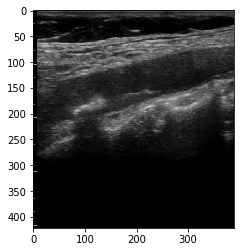

H7DAIDHO.dcm


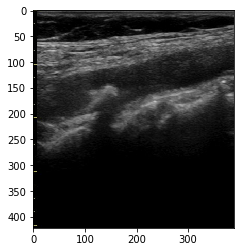

H7DAIDHQ.dcm


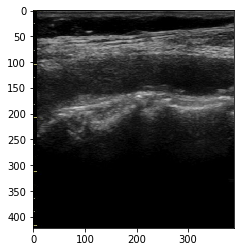

H7DAIDHS.dcm


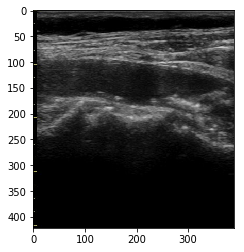

H7DAIDHU.dcm


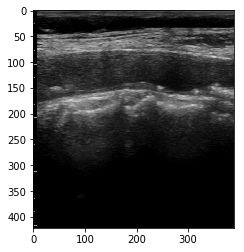

H7DAIDI0.dcm


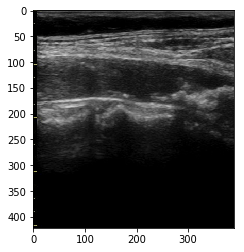

H7DAIDI2.dcm


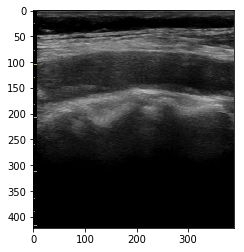

H7DAIDI4.dcm


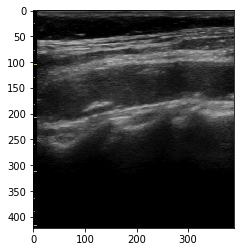

H7DAIDQ6.dcm


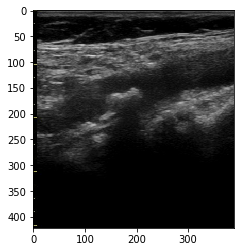

H7DAIDQ8.dcm


In [6]:
useful_array = []

for filename in usefulimages:
    dicom_image = pydicom.dcmread(os.path.join(DATA_DIR+'/Useful',filename))
    dicom_array = dicom_image.pixel_array[:,110:500,:]
    plt.imshow(dicom_array)
    dicom_array = cv2.cvtColor(dicom_array, cv2.COLOR_BGR2GRAY)
    plt.show()
    print(filename)
    dicom_array_new = [val for sublist in dicom_array for val in sublist]
    useful_array.append(dicom_array_new)


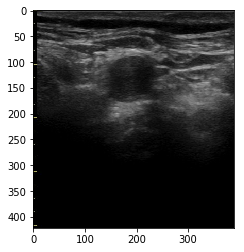

H7DAID10.dcm


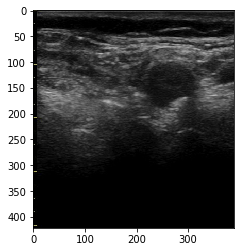

H7DAID12.dcm


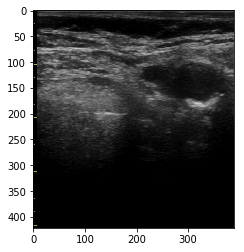

H7DAID14.dcm


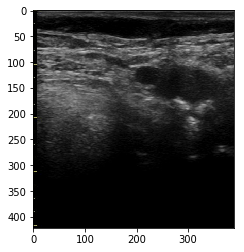

H7DAID16.dcm


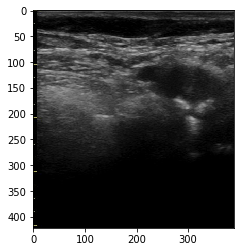

H7DAID98.dcm


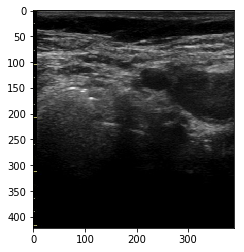

H7DAID9A.dcm


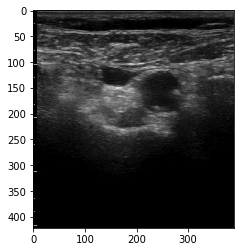

H7DAIDQA.dcm


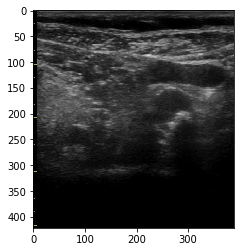

H7DAIDQC.dcm


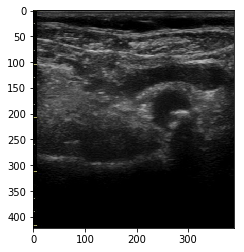

H7DAIDQE.dcm


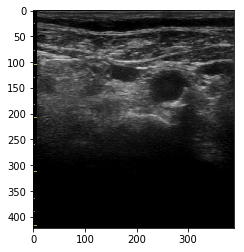

H7DAIDQG.dcm


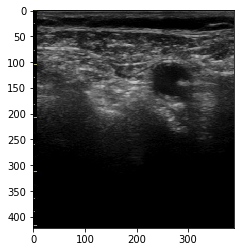

H7DAIDQI.dcm


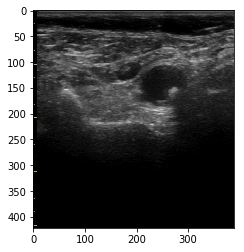

H7DAIE2K.dcm


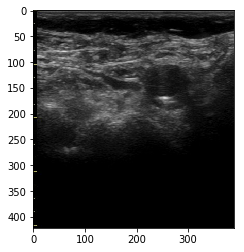

H7DAIE2M.dcm


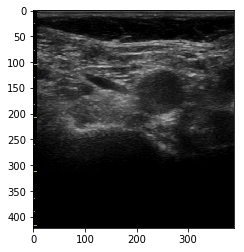

H7DAIE2O.dcm


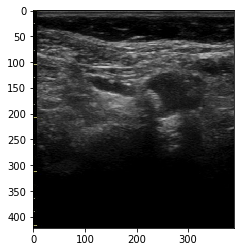

H7DAIE2Q.dcm


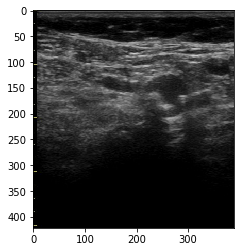

H7DAIE2S.dcm


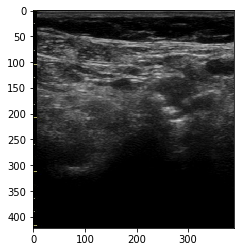

H7DAIE2U.dcm


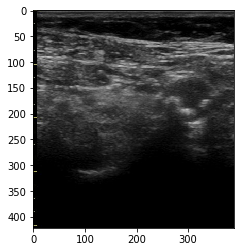

H7DAIEB0.dcm


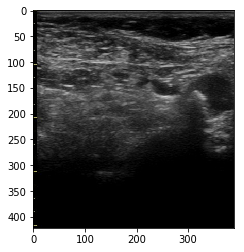

H7DAIEB2.dcm


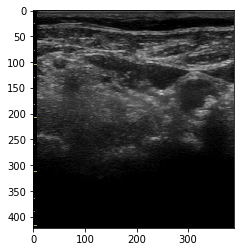

H7DAIEB4.dcm


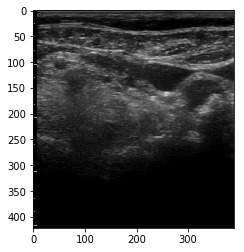

H7DAIEB6.dcm


In [7]:
notuseful_array = []

for filename in notusefulimages:
    dicom_image = pydicom.dcmread(os.path.join(DATA_DIR+'/Notuseful',filename))
    dicom_array = dicom_image.pixel_array[:,110:500,:]
    plt.imshow(dicom_array)
    dicom_array = cv2.cvtColor(dicom_array, cv2.COLOR_BGR2GRAY)
    plt.show()
    print(filename)
    dicom_array_new = [val for sublist in dicom_array for val in sublist]
    notuseful_array.append(dicom_array_new)


In [8]:
x_tr_useful = np.array(useful_array)
x_tr_not = np.array(notuseful_array)

In [9]:
print(x_tr_useful.shape)
print(x_tr_not.shape)

(25, 164580)
(21, 164580)


In [10]:
y_tr_useful = np.ones(25)
y_tr_not = np.zeros(21)

print(y_tr_useful)
print(y_tr_not)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
y_tr = np.concatenate((y_tr_useful, y_tr_not))
x_tr = np.concatenate((x_tr_useful,x_tr_not))

In [13]:
print(x_tr.shape)
print(y_tr.shape)

(46, 164580)
(46,)


In [17]:
from sklearn.preprocessing import MinMaxScaler
## first you need to create a "scaler" object
scaler = MinMaxScaler(feature_range=(-1,1))
## then you actually scale data by fitting the scaler object on the data
scaler.fit(x_tr)
x_tr = scaler.transform(x_tr)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [29]:
z_tr = pca.fit_transform(x_tr)

In [30]:
z_tr.shape

(46, 2)

In [31]:
print(pca.explained_variance_ratio_)

[0.12135744 0.10336673]


In [33]:
vars = pca.explained_variance_ratio_
p = figure(plot_width=400, plot_height=400, title="PCA of Train data")
p.circle(z_tr[y_tr==0, 0], z_tr[y_tr==0, 1], line_color="orange", fill_color="orange")
p.circle(z_tr[y_tr==1, 0], z_tr[y_tr==1, 1], line_color="blue", fill_color="blue")
p.xaxis.axis_label = "PC1 (%.2f%%)" % (100*vars[0])
p.yaxis.axis_label = "PC2 (%.2f%%)" % (100*vars[1])
show(p)


In [34]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

In [35]:
knn.fit(x_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [36]:
y_pred_knn = knn.predict(x_ts) # predict labels on test data

NameError: name 'x_ts' is not defined